In [1]:
import numpy as np
import pandas as pd

In [88]:
df=pd.read_csv("/content/beer-servings.csv",index_col='Unnamed: 0')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [90]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [91]:
df.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


ploting graph

array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

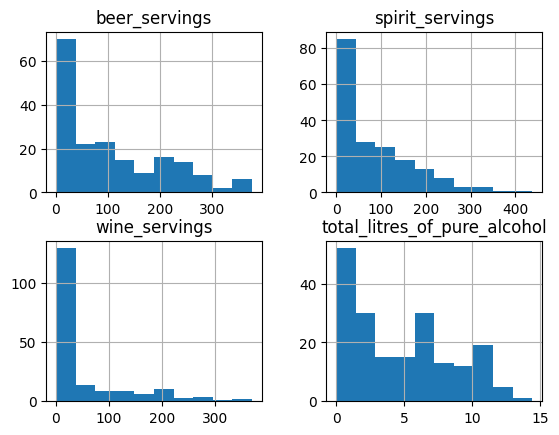

In [92]:
frequencies=df.select_dtypes(include='float64')
frequencies.hist()



*   all are skewed distributions



In [93]:
#so we use median

In [94]:
df['wine_servings']=df['wine_servings'].fillna(df['wine_servings'].median())

In [95]:
df['total_litres_of_pure_alcohol']=df['total_litres_of_pure_alcohol'].fillna(df['total_litres_of_pure_alcohol'].median())

In [96]:
df['beer_servings']=df['beer_servings'].fillna(df['beer_servings'].median())

In [97]:
df['spirit_servings']=df['spirit_servings'].fillna(df['spirit_servings'].median())

In [98]:
df.isna().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


**outlier**

In [99]:
data=pd.read_csv("/content/beer-servings.csv",index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [100]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [101]:
num_col=['beer_servings','spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

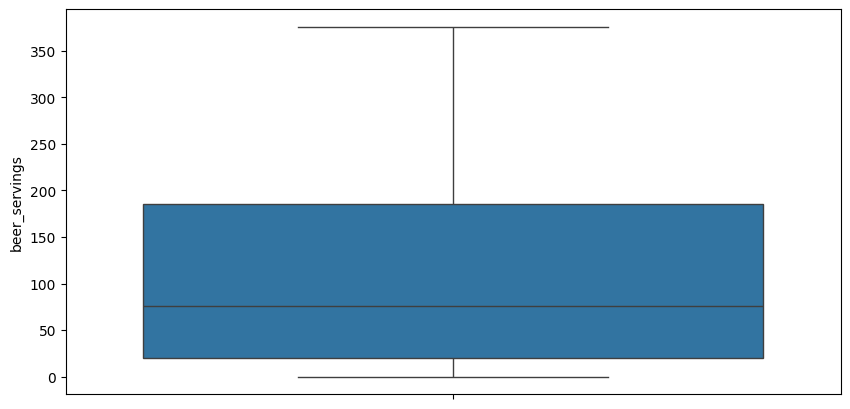

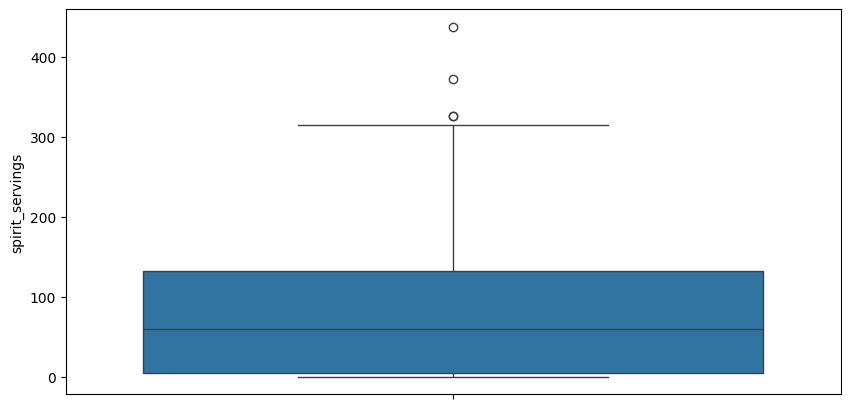

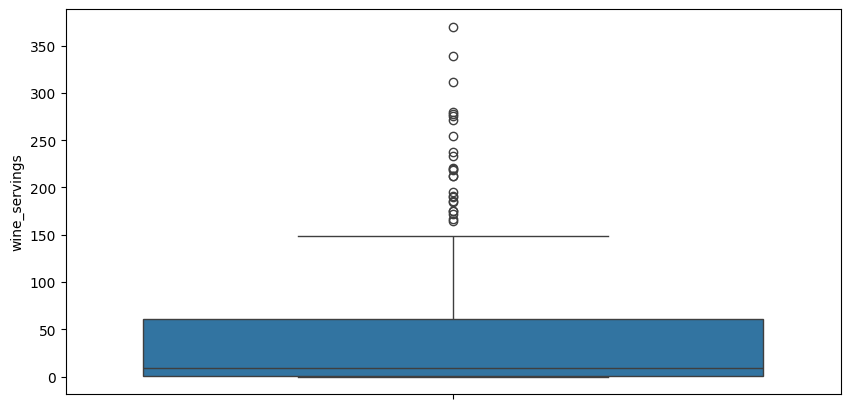

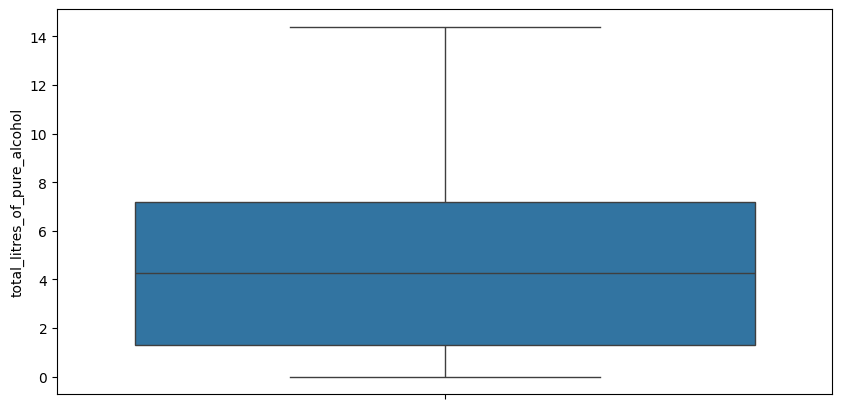

In [103]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i])
  plt.show

In [104]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [105]:
outlier_col=['spirit_servings', 'wine_servings']

In [106]:
for i in outlier_col:
  q1=data[i].quantile(0.25)
  q2=data[i].quantile(0.50)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  lower_limt=q1-1.5*iqr
  upper_limt=q3+1.5*iqr
  outlier=[]
  for x in data[i]:
    if (x>upper_limt) or (x<lower_limt):
      outlier.append(x)
  print(i,outlier)



spirit_servings [373.0, 438.0, 326.0, 326.0]
wine_servings [312.0, 221.0, 212.0, 191.0, 212.0, 172.0, 254.0, 278.0, 233.0, 370.0, 175.0, 218.0, 185.0, 165.0, 237.0, 271.0, 190.0, 175.0, 339.0, 167.0, 276.0, 186.0, 280.0, 195.0, 220.0]


In [107]:
for i in outlier_col:
    data[i]=data[i].clip(lower=lower_limt,upper=upper_limt)


**spirit_servings**

In [108]:
q1=data['spirit_servings'].quantile(0.25)
q2=data['spirit_servings'].quantile(0.50)
q3=data['spirit_servings'].quantile(0.75)

In [109]:
q1

4.0

In [110]:
q2

60.0

In [111]:
q3

132.0

In [112]:
iqr=q3-q1
iqr

128.0

In [113]:
lower_limt=q1-1.5*iqr
upper_limt=q3+1.5*iqr

In [114]:
lower_limt

-188.0

In [115]:
upper_limt

324.0

In [116]:
outlier=[]

for x in data['spirit_servings']:
  if (x>upper_limt) or (x<lower_limt):
    outlier.append(x)

In [117]:
outlier

[]

In [118]:
data['spirit_servings']=data['spirit_servings'].clip(lower=lower_limt,upper=upper_limt)

In [119]:
outlier

[]

**Encoding**

**1)Label encoding**

In [120]:
data1=data.copy()

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
label_en=LabelEncoder()

In [123]:
data1.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [124]:
data1.nunique()

,0
country,193
beer_servings,126
spirit_servings,71
wine_servings,56
total_litres_of_pure_alcohol,90
continent,6


In [125]:
data1['continent']=label_en.fit_transform(data1['continent'])

In [126]:
data1['continent']

,continent
0,1
1,2
2,0
3,2
4,0
...,...
188,5
189,1
190,1
191,0


**one hot encoding**

In [127]:
data2=data.copy()

In [135]:
data2.drop('country',axis=1,inplace=True)
data2.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.00,0.0,Asia
1,89.0,132.0,54.00,4.9,Europe
2,25.0,0.0,14.00,0.7,Africa
3,245.0,138.0,149.75,12.4,Europe
4,217.0,57.0,45.00,5.9,Africa


In [140]:
data2=pd.get_dummies(data2,dtype=int)

#pd.get_dummies - create columns according to the no of unique values present

In [141]:
data2.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.00,0.0,False,True,False,False,False,False
1,89.0,132.0,54.00,4.9,False,False,True,False,False,False
2,25.0,0.0,14.00,0.7,True,False,False,False,False,False
3,245.0,138.0,149.75,12.4,False,False,True,False,False,False
4,217.0,57.0,45.00,5.9,True,False,False,False,False,False


In [144]:
data3=data.copy()

In [142]:
from sklearn.preprocessing import OneHotEncoder

In [150]:
one_hot=OneHotEncoder(sparse_output=False)

In [156]:
data3['continent']=one_hot.fit_transform(data3[['continent']])

In [158]:
data3.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.00,0.0,0.0
1,Albania,89.0,132.0,54.00,4.9,0.0
2,Algeria,25.0,0.0,14.00,0.7,1.0
3,Andorra,245.0,138.0,149.75,12.4,0.0
4,Angola,217.0,57.0,45.00,5.9,1.0


**scaling**

**standard scaling**

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
data4=data3.drop('country',axis=1)

In [162]:
data4.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.00,0.0,0.0
1,89.0,132.0,54.00,4.9,0.0
2,25.0,0.0,14.00,0.7,1.0
3,245.0,138.0,149.75,12.4,0.0
4,217.0,57.0,45.00,5.9,1.0


In [163]:
scalar=StandardScaler()

In [175]:
data5=scalar.fit_transform(data4)

In [177]:
pd.DataFrame(data5)

,0,1,2,3,4
0,-1.048594,-1.144747,-0.728257,-1.261810,-0.615282
1,-0.160837,1.093735,0.266762,0.042134,-0.615282
2,-0.799224,-1.144747,-0.470289,-1.075532,1.625272
3,1.395232,1.195484,2.031079,2.037967,-0.615282
4,1.115937,-0.178130,0.100926,0.308245,1.625272
...,...,...,...,...,...
188,NaN,0.551073,-0.672978,0.787245,-0.615282
189,0.058609,-1.110831,-0.709831,-0.729588,-0.615282
190,-0.988745,-1.144747,-0.728257,-1.235199,-0.615282
191,-0.729400,-0.822542,-0.654552,-0.596532,1.625272


**min max scalar**

In [179]:
data6=data4.copy()

In [180]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
sc=MinMaxScaler()

In [186]:
data7=sc.fit_transform(data6)

In [189]:
pd.DataFrame(data7)

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.236702,0.881469,0.360601,0.340278,0.0
2,0.066489,0.000000,0.093489,0.048611,1.0
3,0.651596,0.921536,1.000000,0.861111,0.0
4,0.577128,0.380634,0.300501,0.409722,1.0
...,...,...,...,...,...
188,NaN,0.667780,0.020033,0.534722,0.0
189,0.295213,0.013356,0.006678,0.138889,0.0
190,0.015957,0.000000,0.000000,0.006944,0.0
191,0.085106,0.126878,0.026711,0.173611,1.0
